In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_complete.csv")

# Display the first few rows
print(dataset.head())

# Display the column info
dataset.info()

#This step initializes the necessary Python libraries for data manipulation (pandas, numpy) and visualization (seaborn, matplotlib).
#This loads the dataset and previews its structure to understand its features, datatypes, and any missing values.

   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension diagnosis  
0    0.2419            0.07871         M  
1    0.1812            0.05667         M  
2    0.2069            0.05999         M  
3    0.2597            0.09744         M  
4    0.1809            0.05883         M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 no

In [2]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

# Fill missing numeric values with the mean (if applicable)
for col in dataset.select_dtypes(include=['float64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

# Missing data can distort analysis. If present, numeric missing values are replaced with their column mean.

Missing values per column:
 radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis            0
dtype: int64


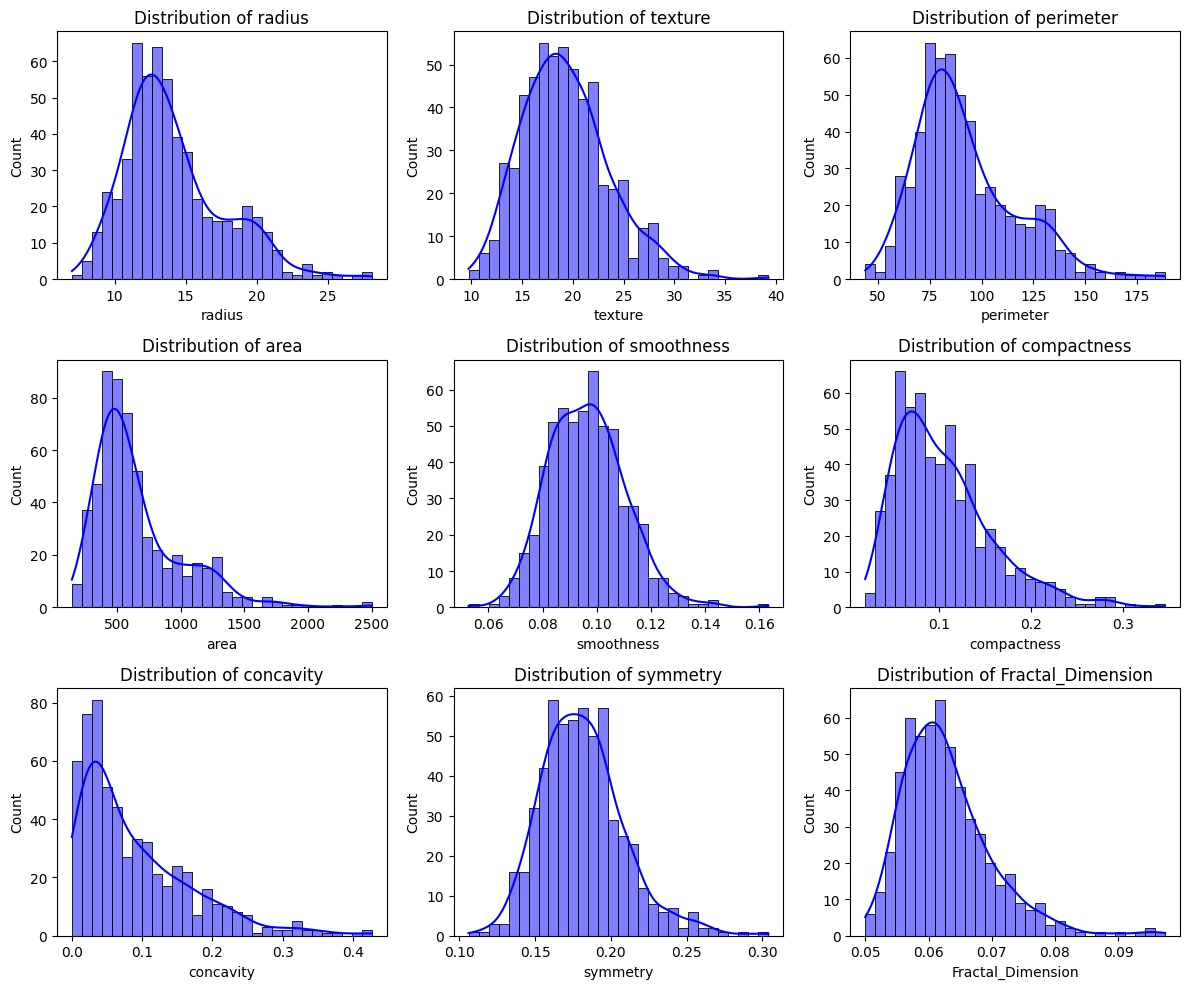

In [3]:
# Plot histograms for all numeric features
numeric_columns = dataset.select_dtypes(include=['float64']).columns

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Skewness Interpretation for Numeric Variables

# Radius
# Distribution: Slightly right-skewed.
# Interpretation: Most values cluster around smaller radii, but there are a few larger values pulling the tail to the right.

# Texture
# Distribution: Nearly symmetric or slightly right-skewed.
# Interpretation: The texture values are evenly distributed around the mean with no significant outliers.

# Perimeter
# Distribution: Right-skewed.
# Interpretation: Most observations have smaller perimeter values, but a few large values extend the tail to the right.

# Area
# Distribution: Highly right-skewed.
# Interpretation: Most samples have smaller area values, with a significant number of large outliers influencing the tail.

# Smoothness
# Distribution: Symmetric or slightly right-skewed.
# Interpretation: Smoothness is evenly distributed around the mean, with no extreme outliers.

# Compactness
# Distribution: Right-skewed.
# Interpretation: Most samples have lower compactness values, with fewer higher values creating a right tail.

# Concavity
# Distribution: Strongly right-skewed.
# Interpretation: A large number of samples have low concavity values, with a few high values extending the right tail.

# Symmetry
# Distribution: Symmetric.
# Interpretation: Symmetry values are balanced around the mean, with no significant skewness or outliers.

# Fractal Dimension
# Distribution: Slightly right-skewed.
# Interpretation: The majority of fractal dimension values are low, with a few higher values extending the tail to the right.

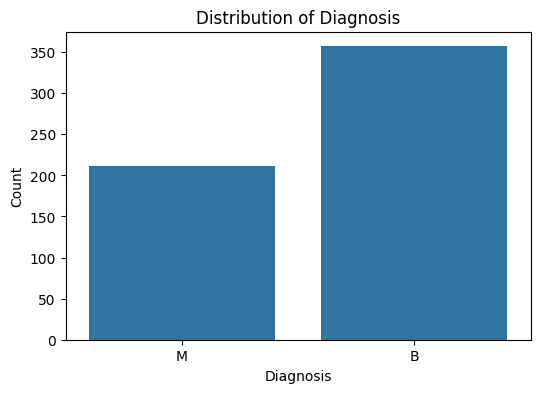

In [5]:
# Plot count plot for the categorical variable
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='diagnosis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()
#This provides an overview of the frequency of categorical labels like diagnosis (e.g., Malignant vs. Benign).

In [ ]:
#Distribution of Diagnosis (Count Plot):
#Observation:
#The count plot shows the frequency distribution of the diagnosis variable.
#The two categories, M (Malignant) and B (Benign), represent cancer diagnoses.
#The Benign (B) category has a higher frequency compared to the Malignant (M) category, indicating that there are more 
#benign cases than malignant ones in the dataset.
#Interpretation:
#This imbalance in the class distribution suggests that the dataset may require techniques like oversampling or 
#undersampling if used for machine learning, especially for classification tasks.
#Understanding the class balance is critical to avoid bias in predictive models.

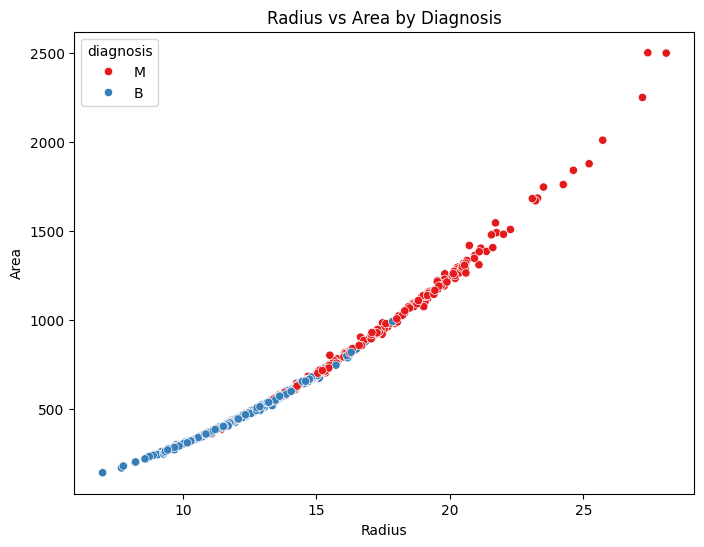

In [6]:
# Scatterplot for two numeric variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='radius', y='area', hue='diagnosis', palette='Set1')
plt.title('Radius vs Area by Diagnosis')
plt.xlabel('Radius')
plt.ylabel('Area')
plt.show()
#Scatterplots help identify relationships or trends. For instance, radius and area may correlate positively, with Malignant diagnoses tending toward higher values.

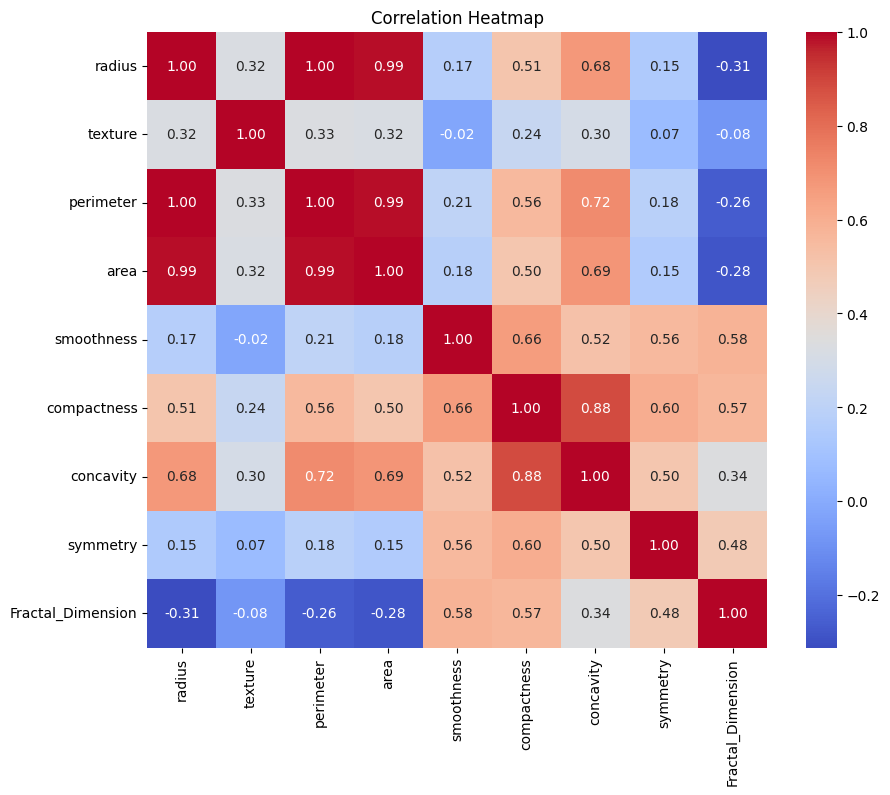

In [8]:
# Correlation matrix and heatmap
# Filter for numeric columns explicitly
correlation_matrix = dataset.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#This shows how numerical variables correlate. Strong correlations (e.g., between radius and perimeter) indicate potential redundancy or feature importance.

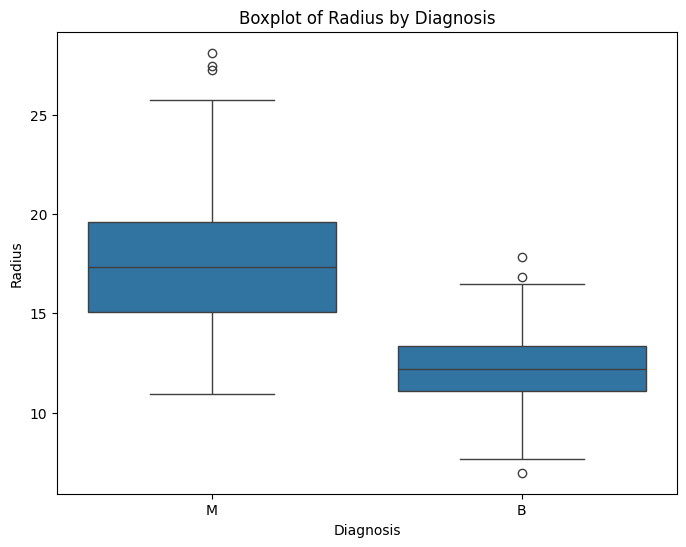

In [10]:
# Boxplot of radius grouped by diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='diagnosis', y='radius')
plt.title('Boxplot of Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius')
plt.show()
#Boxplots compare the distribution of a numerical feature (radius) within categories of a nominal variable (diagnosis).

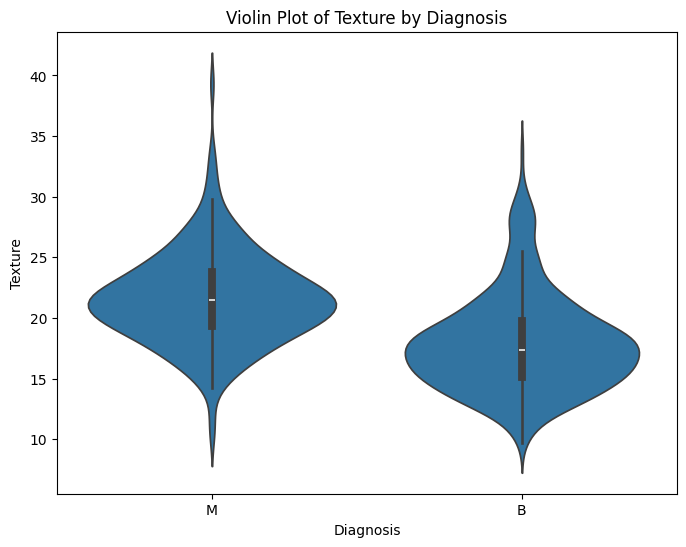

In [12]:
# Violin plot for radius grouped by diagnosis
plt.figure(figsize=(8, 6))
sns.violinplot(data=dataset, x='diagnosis', y='texture')
plt.title('Violin Plot of Texture by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Texture')
plt.show()
#Violin plots combine boxplot and kernel density estimate, showing both distribution and summary statistics.

In [13]:
#Encoding Categorical values

#Label Encoding
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the diagnosis column
encoder = LabelEncoder()
dataset['diagnosis_encoded'] = encoder.fit_transform(dataset['diagnosis'])
#Converts diagnosis into numeric labels (e.g., Malignant = 1, Benign = 0).

In [15]:
# Apply one-hot encoding
# Creates binary columns for each category of diagnosis.
encoded_data = pd.get_dummies(dataset, columns=['diagnosis'])
print(encoded_data.head())

   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension  diagnosis_encoded  diagnosis_B  diagnosis_M  
0    0.2419            0.07871                  1            0            1  
1    0.1812            0.05667                  1            0            1  
2    0.2069            0.05999                  1            0            1  
3    0.2597            0.09744                  1            0            1  
4    0.1809            0.05883                  1            0            1  


In [19]:
# Save the encoded dataset to a CSV file
encoded_data.to_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv", index=False)

# Import the saved encoded dataset
encoded_dataset = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")

# Display the first few rows to verify
print(encoded_dataset.head())

   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     122.80  1001.0     0.11840      0.27760     0.3001   
1   20.57    17.77     132.90  1326.0     0.08474      0.07864     0.0869   
2   19.69    21.25     130.00  1203.0     0.10960      0.15990     0.1974   
3   11.42    20.38      77.58   386.1     0.14250      0.28390     0.2414   
4   20.29    14.34     135.10  1297.0     0.10030      0.13280     0.1980   

   symmetry  Fractal_Dimension  diagnosis_encoded  diagnosis_B  diagnosis_M  
0    0.2419            0.07871                  1            0            1  
1    0.1812            0.05667                  1            0            1  
2    0.2069            0.05999                  1            0            1  
3    0.2597            0.09744                  1            0            1  
4    0.1809            0.05883                  1            0            1  
